### ffn - Financial Functions for Python

ffn is a library that contains many useful functions for those who work in quantitative finance. It stands on the shoulders of giants (Pandas, Numpy, Scipy, etc.) and provides a vast array of utilities, from performance measurement and evaluation to graphing and common data transformations.

http://pmorissette.github.io/ffn/index.html

In [5]:
import ffn
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [6]:
# download price data from Yahoo! Finance. By default,
# the Adj. Close will be used.
prices = ffn.get('EN.PA,DG.PA', start='2010-01-01')

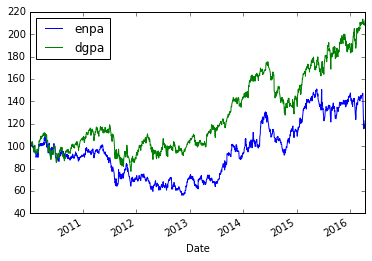

In [7]:
# let's compare the relative performance of each stock
# we will rebase here to get a common starting point for both securities
ax = prices.rebase().plot()

In [8]:
prices.rebase()

,enpa,dgpa
Date,,
2010-01-04,100.000000,100.000000
2010-01-05,101.226329,100.762993
2010-01-06,101.768583,102.151364
2010-01-07,100.375407,102.188871
2010-01-08,100.417119,103.639809
2010-01-11,101.401518,103.064420
2010-01-12,100.850922,101.463451
2010-01-13,101.551681,102.464069
2010-01-14,102.335864,103.739851


In [19]:
# ok now what about some performance metrics?
stats = prices.calc_stats()
stats.display()

Stat                 enpa        dgpa
-------------------  ----------  ----------
Start                2010-01-04  2010-01-04
End                  2016-04-15  2016-04-15
Risk-free rate       0.00%       0.00%

Total Return         22.84%      112.43%
Daily Sharpe         0.26        0.58
CAGR                 3.33%       12.75%
Max Drawdown         -48.43%     -34.95%

MTD                  -13.39%     0.73%
3m                   -11.56%     14.90%
6m                   -8.47%      15.06%
YTD                  -15.04%     11.52%
1Y                   -14.97%     20.04%
3Y (ann.)            22.12%      27.40%
5Y (ann.)            5.31%       13.75%
10Y (ann.)           3.33%       12.75%
Since Incep. (ann.)  3.33%       12.75%

Daily Sharpe         0.26        0.58
Daily Mean (ann.)    7.84%       14.95%
Daily Vol (ann.)     30.65%      25.72%
Daily Skew           0.61        -0.03
Daily Kurt           8.38        1.56
Best Day             15.77%      6.99%
Worst Day            -13.44%     -6

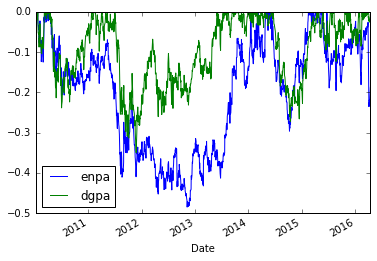

In [20]:
# what about the drawdowns?
ax = stats.prices.to_drawdown_series().plot()

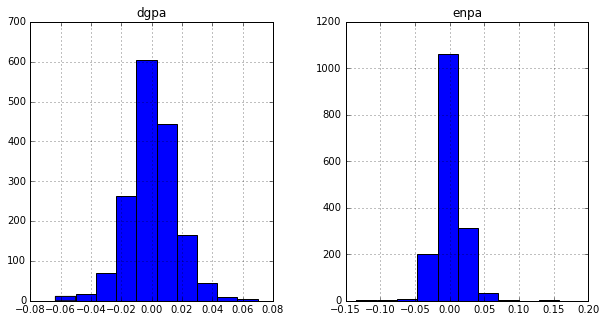

In [21]:
# now what do the return distributions look like?
returns = prices.to_returns().dropna()
ax = returns.hist(figsize(10, 5))

In [27]:
prices = ffn.data.get('^FCHI', start='2010-01-01')

In [28]:
prices.tail()

,fchi
Date,
2016-04-11,4312.629883
2016-04-12,4345.910156
2016-04-13,4490.310059
2016-04-14,4511.509766
2016-04-15,4495.169922


In [29]:
stats = prices.calc_stats()
stats.display()

Stat                 fchi
-------------------  ----------
Start                2010-01-04
End                  2016-04-15
Risk-free rate       0.00%

Total Return         11.99%
Daily Sharpe         0.19
CAGR                 1.82%
Max Drawdown         -33.09%

MTD                  2.51%
3m                   6.77%
6m                   -3.85%
YTD                  -3.06%
1Y                   -14.45%
3Y (ann.)            6.60%
5Y (ann.)            2.49%
10Y (ann.)           1.82%
Since Incep. (ann.)  1.82%

Daily Sharpe         0.19
Daily Mean (ann.)    4.16%
Daily Vol (ann.)     21.88%
Daily Skew           0.07
Daily Kurt           3.02
Best Day             9.66%
Worst Day            -5.48%

Monthly Sharpe       0.26
Monthly Mean (ann.)  4.23%
Monthly Vol (ann.)   16.09%
Monthly Skew         -0.23
Monthly Kurt         -0.50
Best Month           9.93%
Worst Month          -11.33%

Yearly Sharpe        0.27
Yearly Mean          3.53%
Yearly Vol           13.04%
Yearly Skew          -0.57
Ye